<a href="https://colab.research.google.com/github/Memo28/100DayofML/blob/master/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [7]:
test_df = pd.read_csv('titanic-test.csv')
train_df = pd.read_csv('titanic-train.csv')

print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


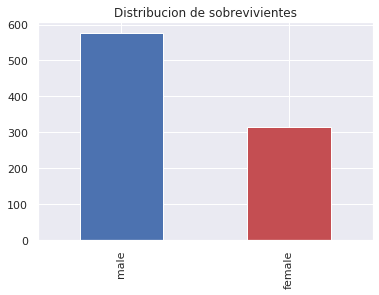

In [9]:
# Mostrando que porcentaje de personas de cada sexo quedaron vivas
train_df.Sex.value_counts().plot(kind= 'bar', color=['b', 'r'])
plt.title('Distribucion de sobrevivientes')
plt.show()

In [10]:
# Label Encoder convierte los datos de texto a una clase de tipo numerico
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# Llenamos con la media los campos de Age que no existan
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
# Llenamos con 'S' los campos de Embarked que esten vacios
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [12]:
# Eliminamos datos que no son relevantes
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

# Etiquetas que el algoritmo tiene que aprender y posteriormente asignar
categorical_cols = [cname for cname in train_predictors.columns if
                    train_predictors[cname].nunique() < 10 and train_predictors[cname].dtype == 'object'
                    ]

categorical_cols

['Sex', 'Embarked']

In [13]:
numerical_cols = [cname for cname in train_predictors.columns if
                  train_predictors[cname].dtype in ['int64', 'float64']
                  ]

numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
my_cols = categorical_cols + numerical_cols
train_predictors = train_predictors[my_cols]

train_predictors

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.0,1,0,7.2500
1,female,C,1,38.0,1,0,71.2833
2,female,S,3,26.0,0,0,7.9250
3,female,S,1,35.0,1,0,53.1000
4,male,S,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,male,S,2,27.0,0,0,13.0000
887,female,S,1,19.0,0,0,30.0000
888,female,S,3,28.0,1,2,23.4500
889,male,C,1,26.0,0,0,30.0000


In [15]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)
dummy_encoded_train_predictors

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [16]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
y_target = train_df['Survived'].values
x_features_one = dummy_encoded_train_predictors.values

In [0]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one, y_target, test_size = 0.25, random_state = 1)


In [24]:
# Creando y entrenando el arbol
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_features_one, y_target)
# Mostrando el porcentaje de efectividad
tree_one_accuracy = round(tree_one.score(x_features_one, y_target), 4)
tree_one_accuracy

0.9798

In [26]:
# Importando el arbol de desiciones que se genero
from io import StringIO
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True